In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r'Boston.csv')
# print(df.head(10))

df[['INDUS', 'PTRATIO']].count()

INDUS      506
PTRATIO    506
dtype: int64

In [3]:
df.drop(columns=['Unnamed: 15','Unnamed: 16'],inplace=True)

In [4]:
df.drop(columns=['CAT. MEDV'],inplace=True)

In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Help on Axes in module matplotlib.axes._axes object:

class Axes(matplotlib.axes._base._AxesBase)
 |  Axes(fig, *args, facecolor=None, frameon=True, sharex=None, sharey=None, label='', xscale=None, yscale=None, box_aspect=None, **kwargs)
 |  
 |  An Axes object encapsulates all the elements of an individual (sub-)plot in
 |  a figure.
 |  
 |  It contains most of the (sub-)plot elements: `~.axis.Axis`,
 |  `~.axis.Tick`, `~.lines.Line2D`, `~.text.Text`, `~.patches.Polygon`, etc.,
 |  and sets the coordinate system.
 |  
 |  Like all visible elements in a figure, Axes is an `.Artist` subclass.
 |  
 |  The `Axes` instance supports callbacks through a callbacks attribute which
 |  is a `~.cbook.CallbackRegistry` instance.  The events you can connect to
 |  are 'xlim_changed' and 'ylim_changed' and the callback will be called with
 |  func(*ax*) where *ax* is the `Axes` instance.
 |  
 |  .. note::
 |  
 |      As a user, you do not instantiate Axes directly, but use Axes creation
 |     

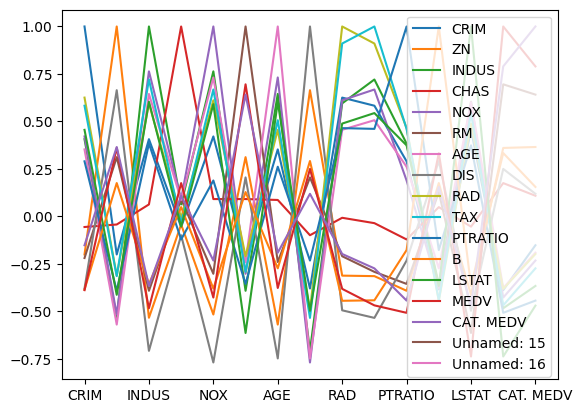

In [20]:
cor = df.corr()
cor.loc["MEDV"]
# cor.loc['MEDV']
# plt.show()
# df.corr().plot(kind='')


<Axes: >

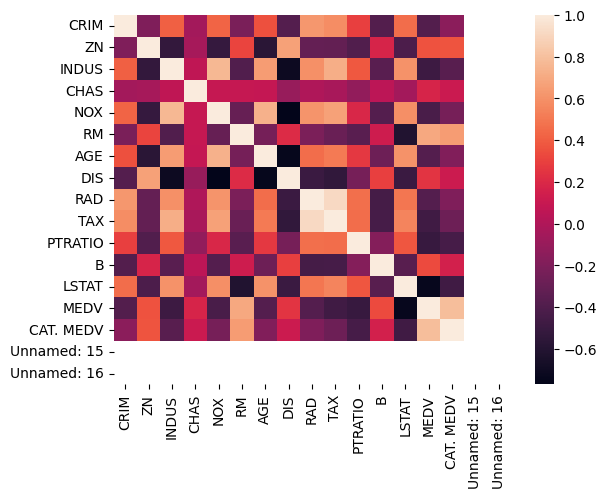

In [10]:
import seaborn as sns
sns.heatmap(cor)

In [10]:
X = df.loc[:,['LSTAT','PTRATIO','RM']]
Y = df.loc[:,"MEDV"]
X.shape,Y.shape

((506, 3), (506,))

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=10)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
scaler.fit(x_train)

StandardScaler()

In [15]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
from keras.models import Sequential
from keras.layers import Dense

In [17]:
model = Sequential()

In [18]:
model.add(Dense(128,input_shape=(3,),activation='linear',name='input'))
model.add(Dense(64,activation='linear',name='layer_1'))
model.add(Dense(128,activation='linear',name='layer_2'))
model.add(Dense(128,activation='linear',name='layer_3'))
model.add(Dense(64,activation='linear',name='layer_4'))
model.add(Dense(64,activation='linear',name='layer_5'))
model.add(Dense(32,activation='linear',name='layer_6'))
model.add(Dense(32,activation='linear',name='layer_7'))
model.add(Dense(16,activation='linear',name='layer_8'))
model.add(Dense(16,activation='linear',name='layer_9'))
model.add(Dense(8,activation='linear',name='layer_10'))
model.add(Dense(8,activation='linear',name='layer_11'))
model.add(Dense(4,activation='linear',name='layer_12'))
model.add(Dense(1,activation='linear',name='output'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# model.summary()

C:\Users\Devanand\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.fit(x_train,y_train,epochs=40,validation_split=0.05)

Epoch 1/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 517.5705 - mae: 21.5378 - val_loss: 591.8354 - val_mae: 22.9925
Epoch 2/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 305.2761 - mae: 16.3943 - val_loss: 73.1797 - val_mae: 5.7055
Epoch 3/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 62.1999 - mae: 6.0728 - val_loss: 105.0558 - val_mae: 6.7113
Epoch 4/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 44.4495 - mae: 4.5827 - val_loss: 85.5074 - val_mae: 6.2679
Epoch 5/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27.1825 - mae: 3.8082 - val_loss: 88.2481 - val_mae: 5.9513
Epoch 6/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26.3002 - mae: 3.4989 - val_loss: 76.2020 - val_mae: 5.4792
Epoch 7/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.7975 - mae: 3.3890 - val_loss: 79.0671 - val_mae: 5.5674
Epoch 8/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.1618 - mae: 3.4506 - val_loss: 73.8302 - val_mae: 5.4426
Epoch 9/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/st

In [20]:
output = model.evaluate(x_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40.6445 - mae: 5.2038 


In [21]:
print(f"Mean Squared Error: {output[0]}"
      ,f"Mean Absolute Error: {output[1]}",sep="\n")

Mean Squared Error: 42.2949333190918
Mean Absolute Error: 5.2821197509765625


In [22]:
y_pred = model.predict(x=x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


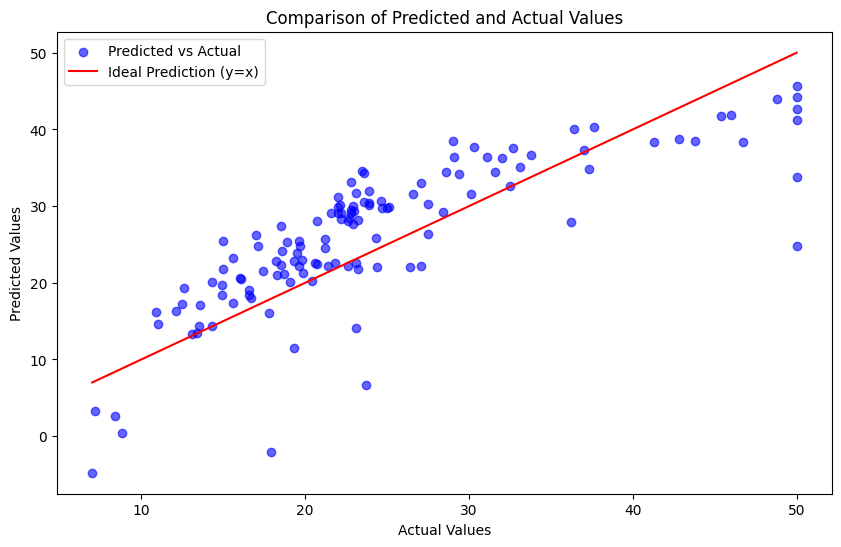

In [23]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual', alpha=0.6)

# Plotting a reference line (y = x) for ideal prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Prediction (y=x)')

# Adding labels and title
plt.title('Comparison of Predicted and Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()
